### TESTING K-FOLD CROSS VALIDATION

In [60]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
frame = load_iris(as_frame=True)
df = pd.DataFrame(data=frame["frame"])
df.head()
df.info()
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df[["target"]]

X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- Class distribution of the dataset

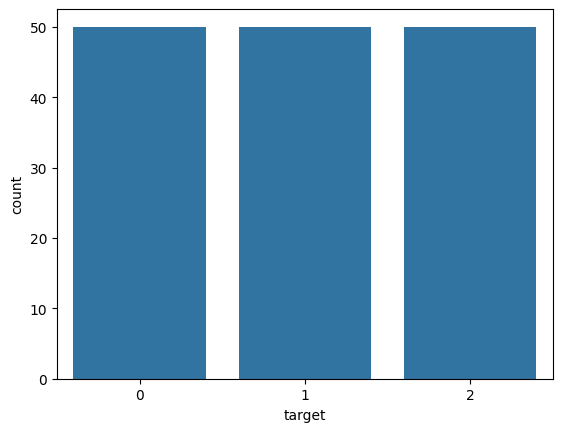

In [4]:
sns.countplot(data=df, x="target")

plt.show()

- HOW TO USE k-fold cross validation to choose the correct hyperparameters of KNN algorithm (hyperparameters are distance defined and k)

In [8]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

- Define the hyperparamters grid

In [66]:
hyperparameter_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

results = []

- Define the process of finding the most appropriate hyperparameters

In [67]:
for n_neighbors in hyperparameter_grid["n_neighbors"]:
    for weights in hyperparameter_grid["weights"]:
        for p in hyperparameter_grid["p"]:
            # we have a combination of parameter
            # for each of the combination, perform k-fold train/val
            
            # to store all the scores for all fold
            fold_scores = []
            
            # Loop for k times
            # each contains a train set and a val set
            for train_index, val_index in kf.split(X=X, y=y):
                # train and test on each fold to find the fold_score
                X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                y_train, y_val = y.iloc[train_index],y.iloc[val_index]
                
                # We have the training set and the val set
                # create the model with the combination of hyperparameters
                model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
                
                # 👇 Flatten y_train to 1D
                model.fit(X=X_train, y=y_train.values.ravel())
                
                y_pred = model.predict(X=X_val)
                
                # 👇 Flatten y_val to 1D too, to avoid same shape issue in metrics
                f1 = f1_score(y_true=y_val.values.ravel(), y_pred=y_pred, average="macro")
                fold_scores.append(f1)
            
            # after k folds, we would have the average performance metric
            # we would calculate the mean
            mean_score = np.mean(a=fold_scores)
            results.append({'n_neighbors': n_neighbors, 'weights': weights, 'p' : p, 'mean_f1': mean_score})

- Sort all the hyperparameters' mean score, and choose the highest

In [74]:
results = sorted(results, key=lambda x: x['mean_f1'], reverse=True)
for r in results:
    print(r)

{'n_neighbors': 7, 'weights': 'distance', 'p': 2, 'mean_f1': np.float64(0.9816672860151121)}
{'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'mean_f1': np.float64(0.9742369454578366)}
{'n_neighbors': 5, 'weights': 'distance', 'p': 2, 'mean_f1': np.float64(0.9742369454578366)}
{'n_neighbors': 7, 'weights': 'uniform', 'p': 2, 'mean_f1': np.float64(0.9735882929830971)}
{'n_neighbors': 9, 'weights': 'distance', 'p': 2, 'mean_f1': np.float64(0.9733644777123038)}
{'n_neighbors': 3, 'weights': 'uniform', 'p': 1, 'mean_f1': np.float64(0.9659341371550283)}
{'n_neighbors': 3, 'weights': 'uniform', 'p': 2, 'mean_f1': np.float64(0.9659341371550283)}
{'n_neighbors': 3, 'weights': 'distance', 'p': 1, 'mean_f1': np.float64(0.9659341371550283)}
{'n_neighbors': 3, 'weights': 'distance', 'p': 2, 'mean_f1': np.float64(0.9659341371550283)}
{'n_neighbors': 5, 'weights': 'uniform', 'p': 1, 'mean_f1': np.float64(0.9659341371550283)}
{'n_neighbors': 5, 'weights': 'distance', 'p': 1, 'mean_f1': np.float64(0.9

### Use the hyperparameters for the test and train set

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

- Train the model with the best hyperparameters

In [58]:
knn = KNeighborsClassifier(n_neighbors=7, weights="distance", p=2)

knn.fit(X=X_train, y=y_train.values.ravel())

y_pred = knn.predict(X=X_test)

f1 = f1_score(y_true=y_test.values.ravel(), y_pred=y_pred, average="macro")

report =  classification_report(y_true=y_test.values.ravel(), y_pred=y_pred)

print("F1 score: ", f1)
print()
print(report)

F1 score:  0.9484126984126985

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      1.00      0.93        13
           2       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



- Automatically find the best hyperparameters using gridSearch

In [70]:
main_model = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=main_model, 
                           param_grid=hyperparameter_grid, 
                           scoring="f1_macro", 
                           cv=k, 
                           n_jobs=-1, 
                           verbose=1)

grid_search.fit(X=X, y=y.values.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,7


- Return the best hyperparameters and best estimator (model with those hyperparameters)

In [72]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Best cross-validation score: 0.9799498746867169


- Use the best hyperparameters model to train on the train and test set

In [73]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

